<a href="https://colab.research.google.com/github/Marcozambeli/Control-Theory-II---UFJF/blob/master/tvc3_controle_2_Marco_Antonio_Zambeli.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Terceiro Trabalho de Teoria de Controle (Turma B) 
$Aluno: Marco Antonio  de  Oliveira Zambeli  201369026c$

$Prof. André Marcato$

#Exemplo 7.26 Ogata (5ed)
## projetar um compensador por avanço de fase para:
 $G(s)=\frac{4}{s(s+2)}$

###1.   Cte de erro estático (Kv) seja $20s^-(1)$
###2.   Margem de fase de pelo menos 50º 
###3.   Margem de ganho de pelo menos 10 dB
O programa deve receber como parametros de entrada a MF, MG e a constante de erro estático de velocidade Kv desejados e fornecer como saída os parâmetros Kc, T e alpha do controlador por avanço.






#Resolução:

In [1]:
!pip install control

     |████████████████████████████████| 256kB 12.8MB/s 
  Created wheel for control: filename=control-0.8.3-py2.py3-none-any.whl size=260982 sha256=def3044d25eefdd85a6325d799fef9aa5413bb1df3d803d0d871299069ecc449
  Stored in directory: /root/.cache/pip/wheels/c2/d9/cc/90b28cb139a6320a3af2285428b6da87eee8d8920c78bb0223
Successfully built control


O ganho para o Kv especificado é K = [10]
A frequencia de cruzamento do Bode em rad/s é aproximadamente: 6.072837998322802
O ângulo correspondente à freq de cruzamento de Bode é : -161.7714606015846
A margem de fase atual, analisada pelo Bode, é 18.228539398415393
O avanço max seguro é Φm  36.77146060158461
nova freq de cruzamento de ganho wc é: 8.82346526884354
 
----------------------RESPOSTAS:-----------------------
a) O Ganho Kc compensador por avanço é: 39.8286734174998
b) O parametro T do compensador é: 0.22618236468402012
c) O alpha do compensador por avanço é: 0.251075397243993


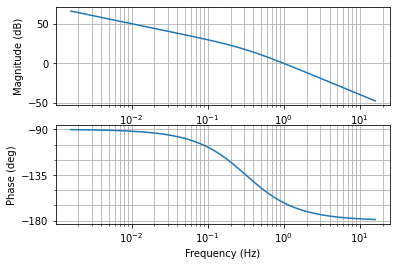

In [180]:
from control.matlab import *
import numpy as np
import sympy as sp
import math

Kv = 20
MFref = 50
MGref = 10 #dB
num1 = [4]
den1 = [1,0]
num2 = [1]
den2 = [1,2]
fator1 = tf(num1,den1)
fator2 = tf(num2, den2)

gh = fator1*fator2

#Ajustar o Ganho K para o requisito Kv = 20 s^(-1)
#calculando Kv = limite para s->0 de s.Gc(s).G(s) = 20:
sp.init_printing()
sp.var('x')
f = sp.Lambda(x, (x*4)/(x*(x+2)))
Lim = sp.limit(f(x),x,0)

Ganho = sp.Symbol("Ganho")
y = sp.Eq(Lim*Ganho,Kv)
K = sp.solve(y,Ganho)

#com isso, descobre-se o valor go Ganho K para atender ao criterio de Kv
print("O ganho para o Kv especificado é K =",K)

#Analise da fase pelo diagrama de Bode para  função G1(s)=KG(s)
w = np.logspace(-2,2,2000)
num1at = [4*10]
fator1at = tf(num1at,den1)
gh2 = fator1at*fator2
diag_bode2 = bode(gh2,w)
w1 = diag_bode2[1]                     #refe-se aos angulos de bode2 em rad 
w2 = diag_bode2[2]                     #refe-se as frequencias de bode2 
gjw_real2 = diag_bode2[0]              #refere-se aos valores modulares de bode2
gjw_real2 = 20*np.log10(gjw_real2)     #transformando-os em dB


i=0
for x in gjw_real2:
  i=i+1
  if x < 0.32:        
   break 
print("A frequencia de cruzamento do Bode em rad/s é aproximadamente:",w2[i-1])
angulobode2 = w1[i-1]*180/(np.pi) #transf de rad para graus
print("O ângulo correspondente à freq de cruzamento de Bode é :",angulobode2) 

#De posse desses valores, podemos calcular a margem de fase do ponto acima com a relaçao:

mf = 180 + angulobode2 #justamente a distancia angular entre o angulo acima e 180º
print("A margem de fase atual, analisada pelo Bode, é", mf) #em graus

#atendendo ao requisito do problema de uma magem de fase de 50º, vemos a diferença da mf atual até a desejada
phimax = MFref - mf

#A adiçao do compensador causa um deslocamento da freq de cruzamento para a direita, assim, por seguraça, adiciona-se 5 graus
phimax = phimax + 5 
print("O avanço max seguro é Φm ", phimax)

#Calculando o fator de atenuaçao alpha pela bib sympy

alfa = sp.Symbol("alfa")
y = sp.Eq((alfa+1)*math.sin(math.radians(phimax)),1-alfa)
a = sp.solve(y,alfa)
#print("alpha",a)

#valor da alteração na curva de módulo em dB em w = 1/sqrt(alfa)*T -que é a media geom entre as freq de canto-
# em decorrencia da inclusao do termo (Ts+1)/(alpha*Ts+1)
alpha=a[0]
avralpha = (1/math.sqrt(alpha)) 
avralphadb = 20*np.log10(avralpha)      #transformando em dB

#resolvendo a eguaçao para |G1(jw)|=- avralphadb = 6,002 dB, para achar a nova freq de cruzamento de ganho WC
num=[4]
den=[1, 2, 0]
ftma_orig = tf(num,den)
[MG, MF, w_cruz_fase, w_cruz_ganho] =margin(ftma_orig)
[MG, MF, wc_fase, wc_ganho] = margin(avralpha*10*ftma_orig)
print("nova freq de cruzamento de ganho wc é:",wc_ganho)

#Calculo do T pela relaçao: 1/T = sqrt(alpha)*wc:
T = avralpha *(1/wc_ganho)

print(" ")
print("----------------------RESPOSTAS:-----------------------")
print("a) O Ganho Kc compensador por avanço é:",K[0]/a[0])
print("b) O parametro T do compensador é:",T)
print("c) O alpha do compensador por avanço é:",alpha)





